Class
0    284315
1       492
Name: count, dtype: int64
Confusion Matrix:
[[83028  2121]
 [ 6494 78946]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     85149
           1       0.97      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



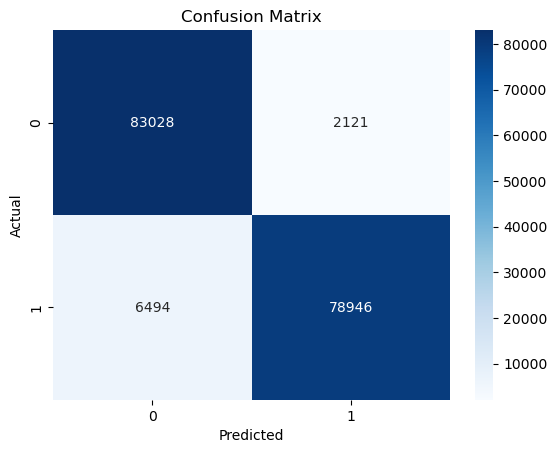

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load dataset
df = pd.read_csv('creditcard.csv')
print(df['Class'].value_counts())

# Step 2: Handle imbalance using SMOTE
X = df.drop('Class', axis=1)
y = df['Class']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 3: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# Step 4: Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# Step 5: Predictions and evaluation
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
